# Tree Survival Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d yekenot/tree-survival-prediction

Dataset URL: https://www.kaggle.com/datasets/yekenot/tree-survival-prediction
License(s): CC0-1.0
100%|██████████████████████████████████████| 58.8k/58.8k [00:00<00:00, 83.8kB/s]
100%|██████████████████████████████████████| 58.8k/58.8k [00:00<00:00, 83.7kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('//home/bhxveshhh/ML/Tree Survival Prediction/tree-survival-prediction.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Tree Survival Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Tree_Data.csv')

In [23]:
df.head(5)

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,0,0
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,0,1
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,0,0
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,0,0
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,0,0


In [7]:
df.shape

(2783, 24)

In [10]:
df.size

66792

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,2783.0,3914.513834,2253.515063,3.000,1971.000,3932.000,5879.000,7772.000
Plot,2783.0,9.561624,5.203659,1.000,5.000,10.000,14.000,18.000
Light_ISF,2783.0,0.085707,0.025638,0.032,0.066,0.082,0.100,0.161
Core,2783.0,2016.648940,0.477387,2016.000,2016.000,2017.000,2017.000,2017.000
AMF,2783.0,20.553069,12.309587,0.000,13.400,18.000,24.445,100.000
EMF,1283.0,26.476750,16.636890,0.000,13.780,27.720,35.710,87.500
Phenolics,2783.0,1.933105,1.969842,-1.350,0.170,0.750,3.780,6.100
Lignin,2783.0,15.759792,6.779607,2.230,10.355,14.040,21.115,32.770
NSC,2783.0,14.219641,4.298271,4.300,11.605,12.660,17.275,29.450
Census,2783.0,15.282070,9.166555,4.000,7.000,13.000,18.000,33.000


In [12]:
df.isnull().sum()

No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             1
Harvest        2079
Alive          2292
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.nunique()

No             2783
Plot             18
Subplot           5
Species           4
Light_ISF        53
Light_Cat         3
Core              2
Soil              7
Adult            36
Sterile           2
Conspecific       3
Myco              2
SoilMyco          3
PlantDate        19
AMF             924
EMF             682
Phenolics       494
Lignin         1095
NSC             998
Census           22
Time             22
Event             2
Harvest           1
Alive             1
dtype: int64

In [15]:
df['Alive'].value_counts()

Alive
X    491
Name: count, dtype: int64

In [16]:
df['Harvest'].value_counts()

Harvest
X    704
Name: count, dtype: int64

In [17]:
df['EMF'].value_counts()

EMF
0.00     77
22.73     9
50.00     8
35.71     7
57.14     6
         ..
40.07     1
42.18     1
32.06     1
21.60     1
26.04     1
Name: count, Length: 682, dtype: int64

In [25]:
df['Adult'].value_counts()

Adult
I       90
984     90
689     89
J       89
970     88
921     88
275     88
H       88
1757    86
1478    85
1454    85
961     84
1297    83
1330    83
G       83
415     82
561     82
1205    81
1715    80
1027    80
1323    79
1320    78
1688    78
1595    77
118     69
277     68
1201    65
1332    65
1386    65
1468    64
394     64
891     63
50      63
285     62
1384    61
1326    58
Name: count, dtype: int64

In [18]:
# Mapping 'X' to 1 and NaN to 0 for 'Alive' and 'Harvest' columns

df['Alive'] = df['Alive'].map({'X': 1, np.nan: 0})
df['Harvest'] = df['Harvest'].map({'X': 1, np.nan: 0})

## Data Visualization

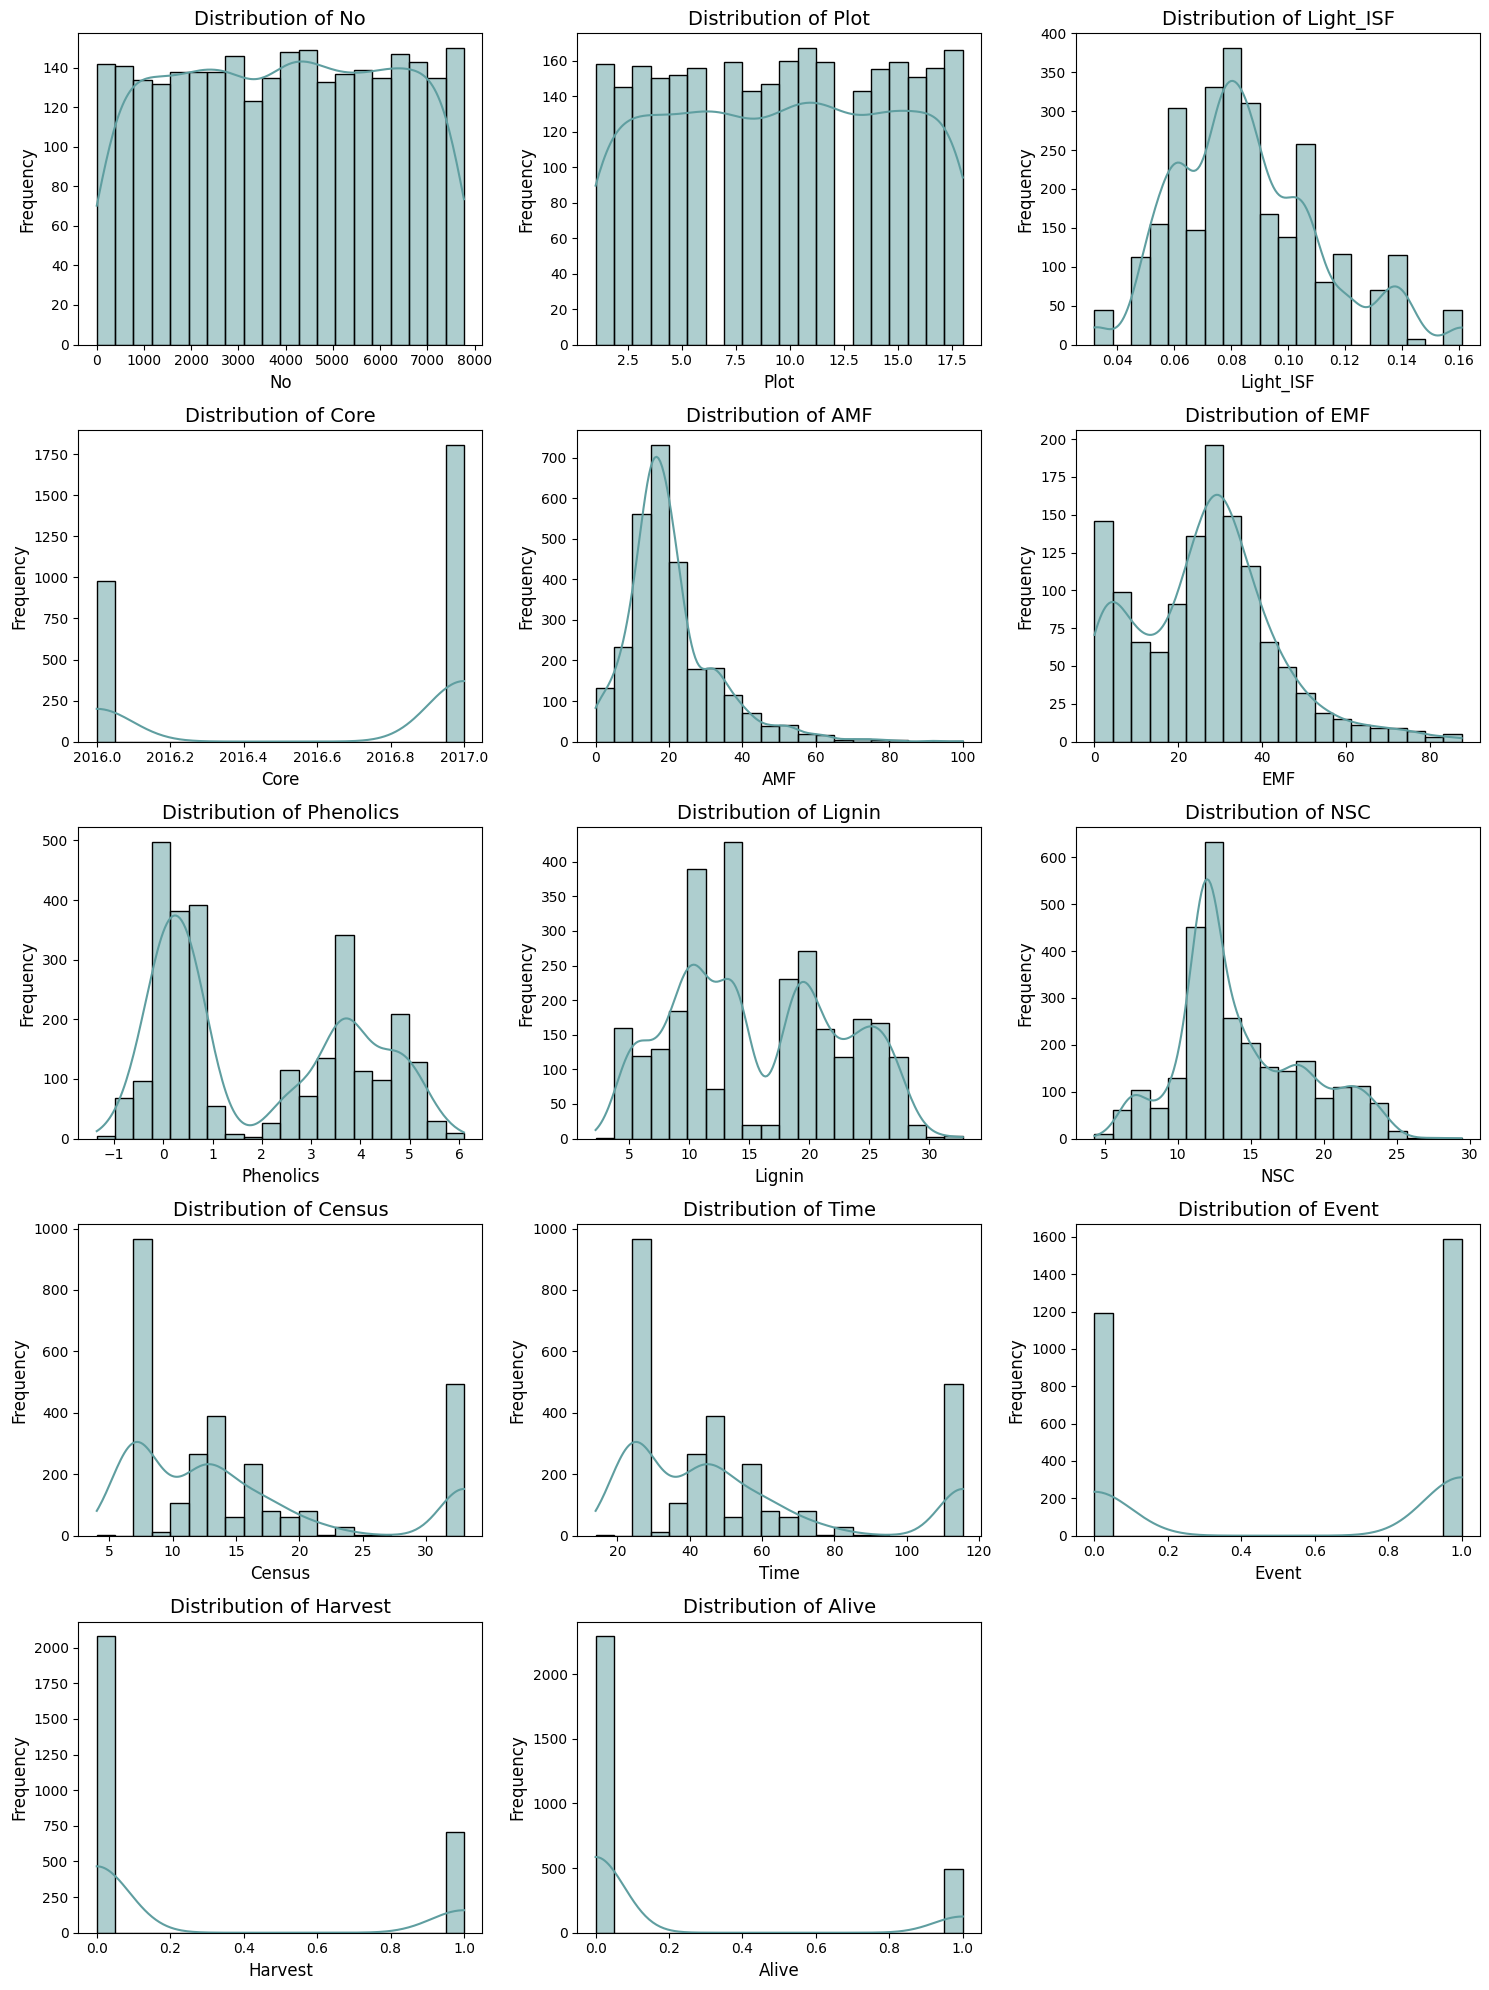

In [19]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True, axis=1)

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

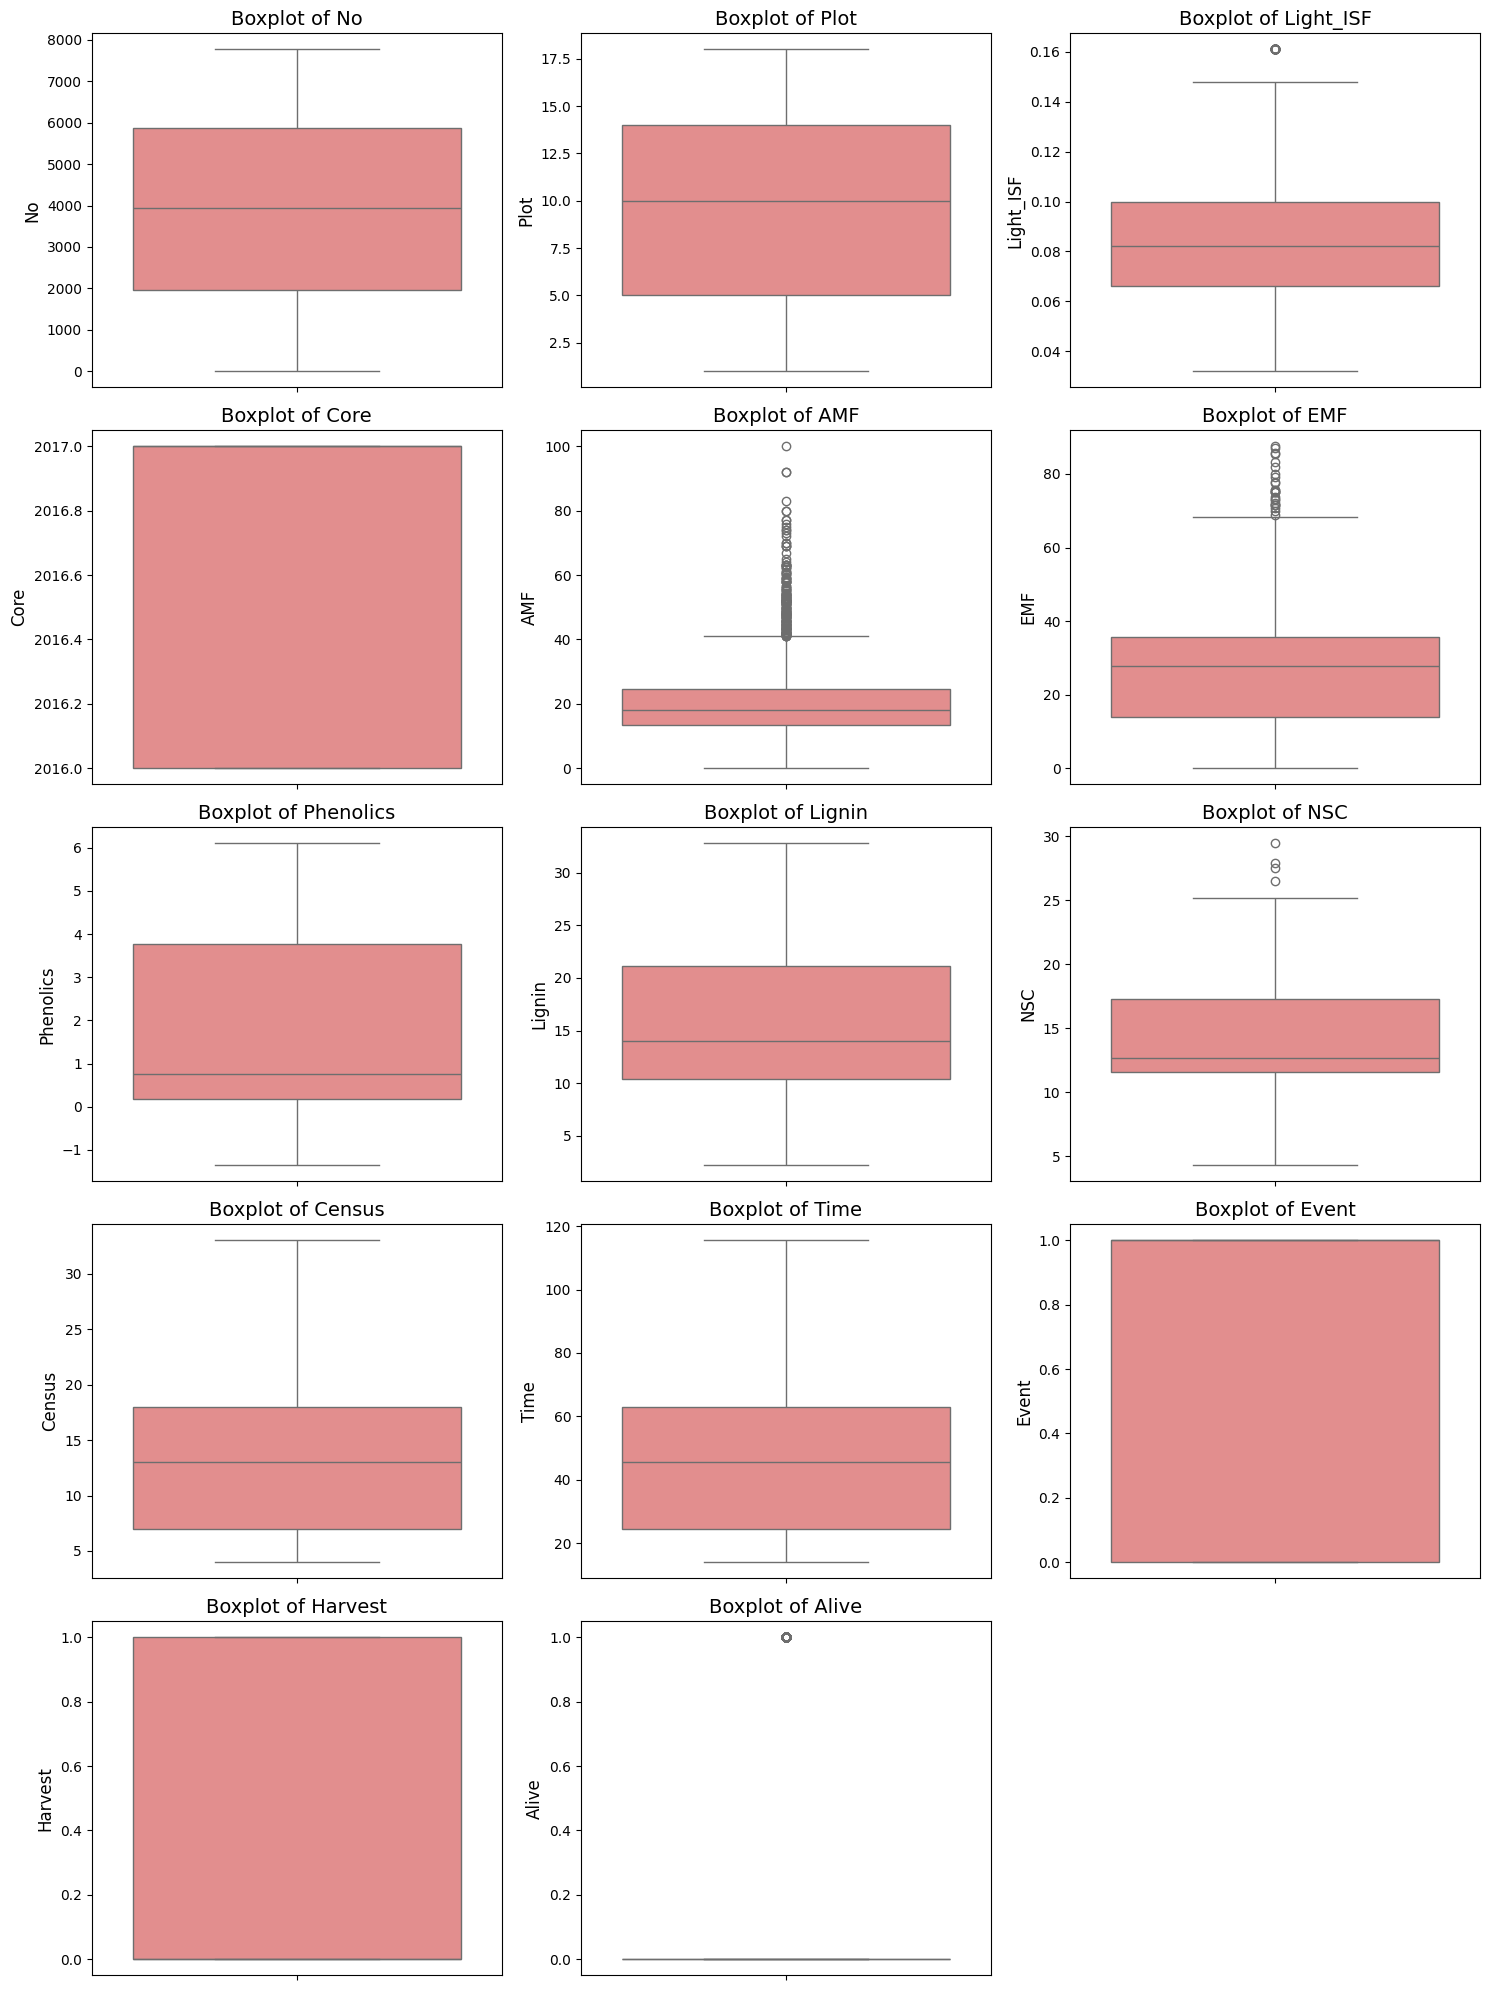

In [20]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

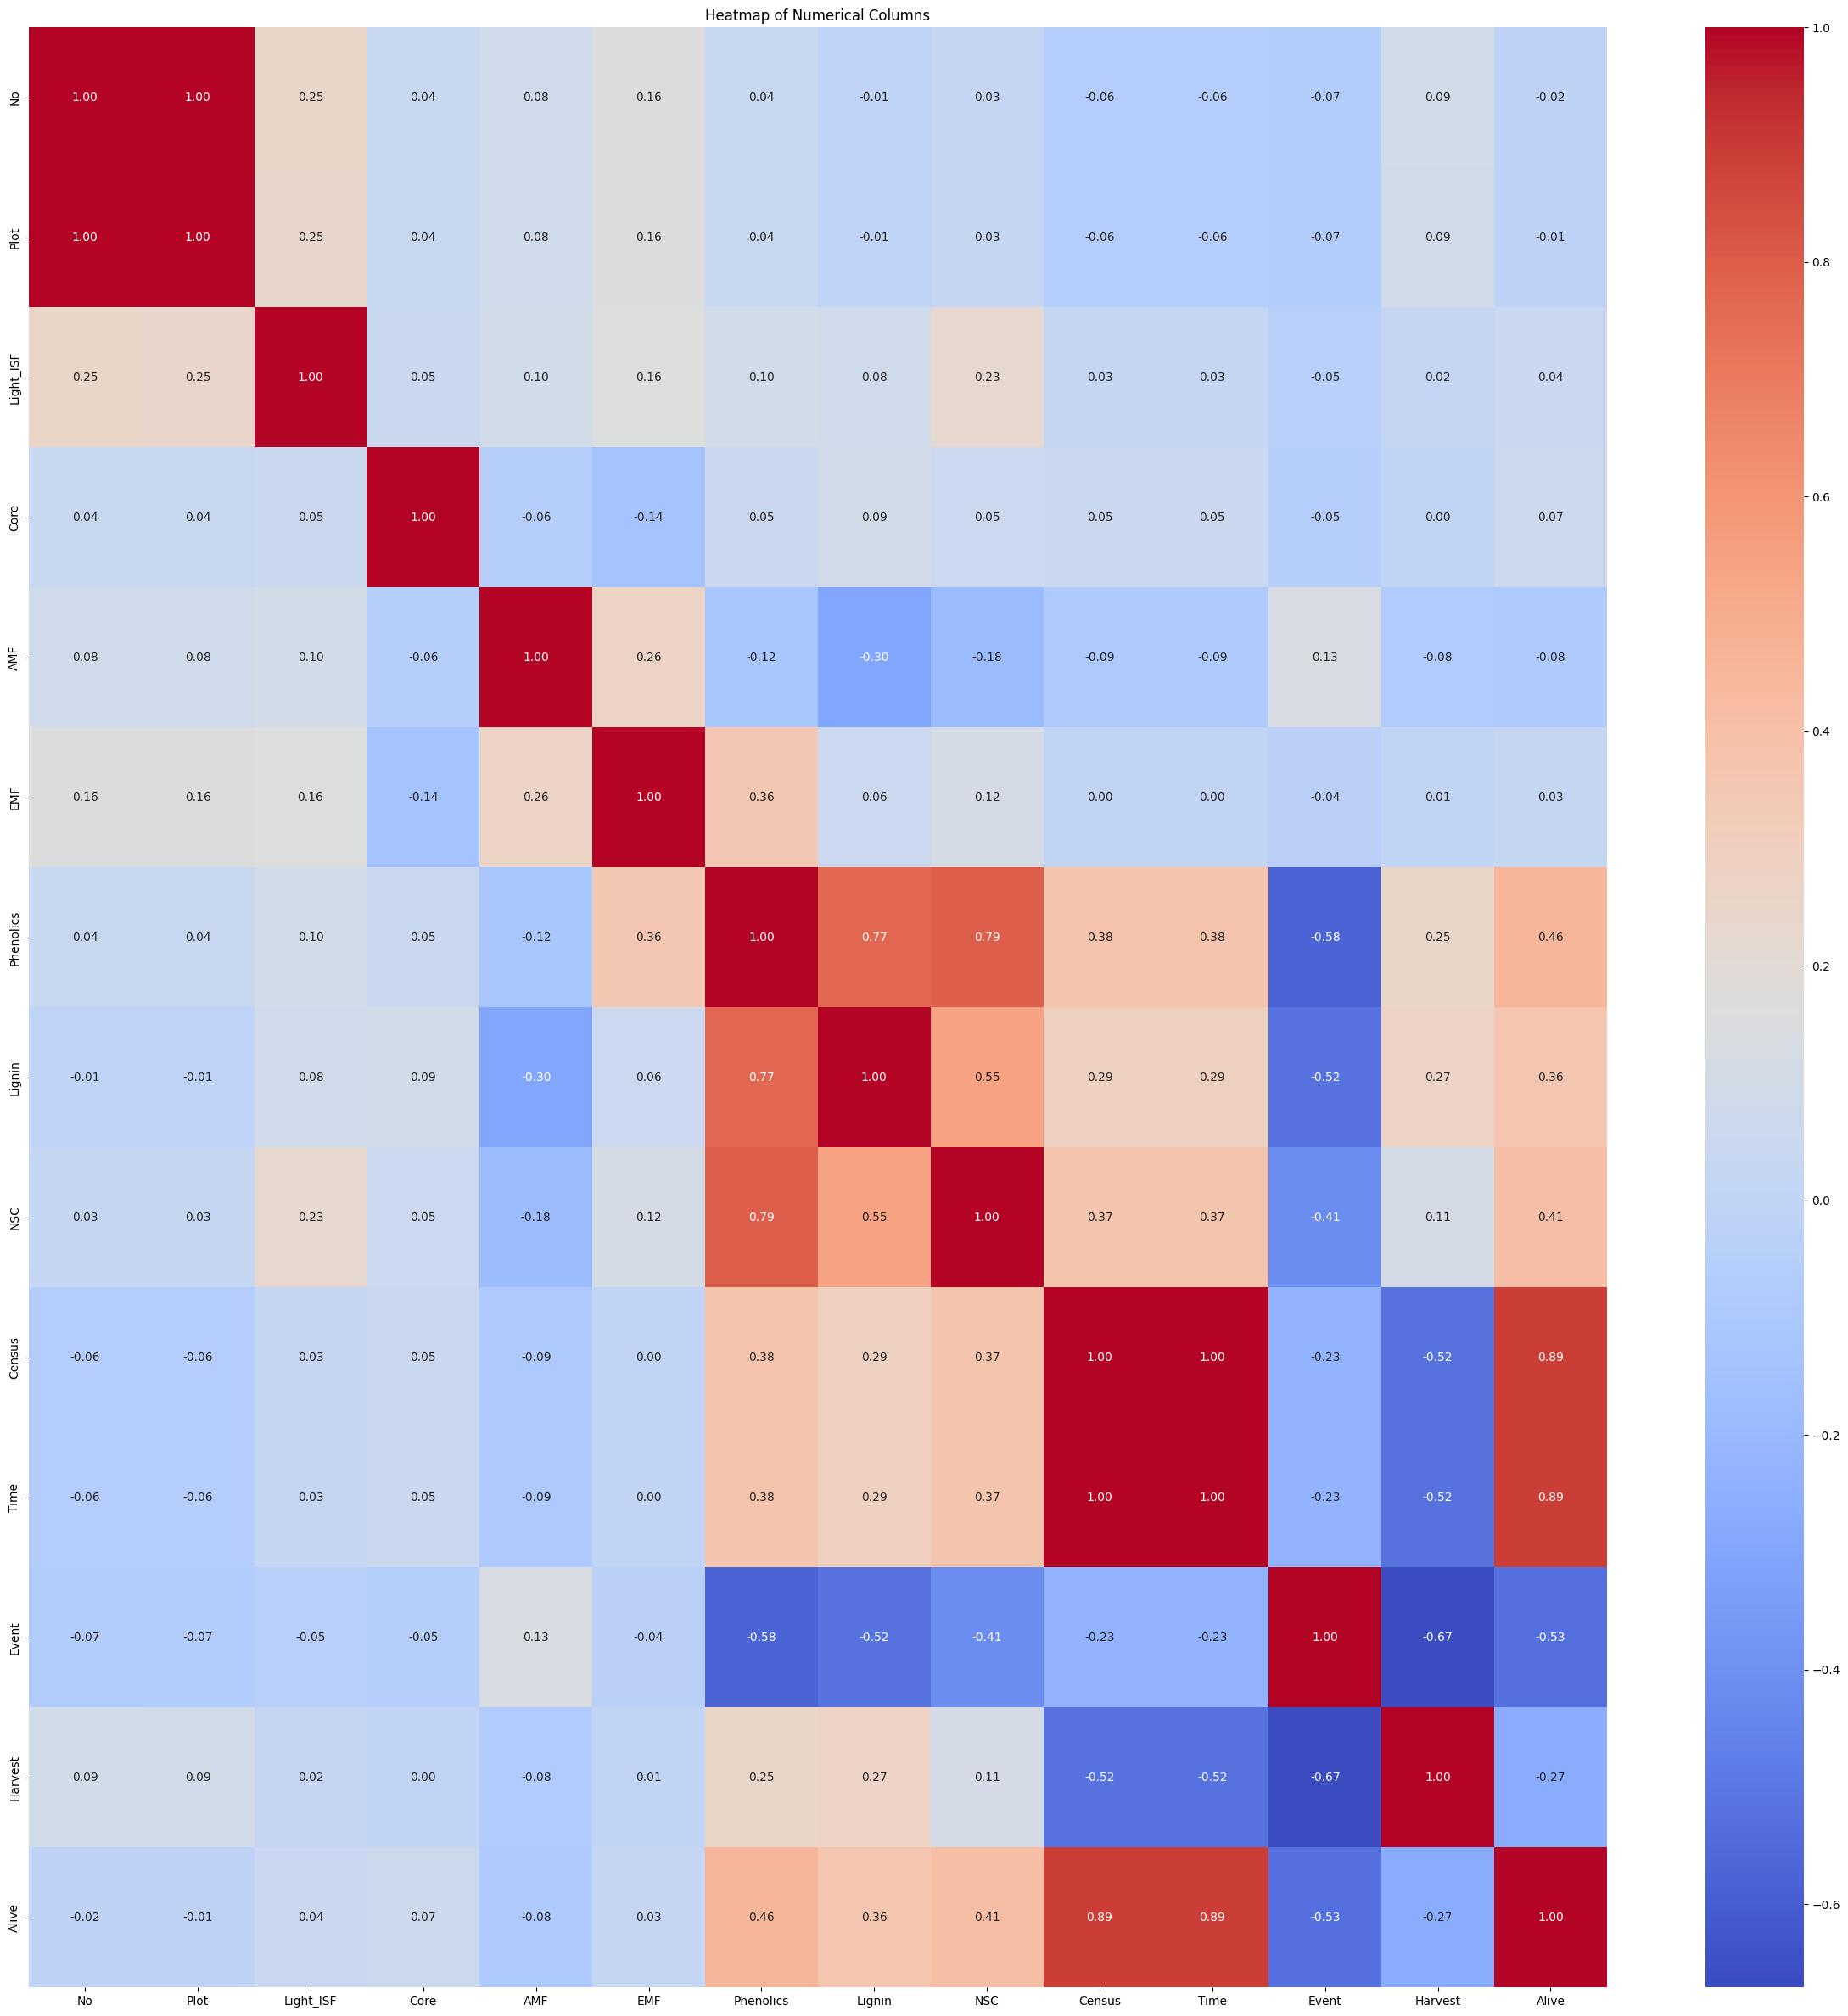

In [21]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(30, 30))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

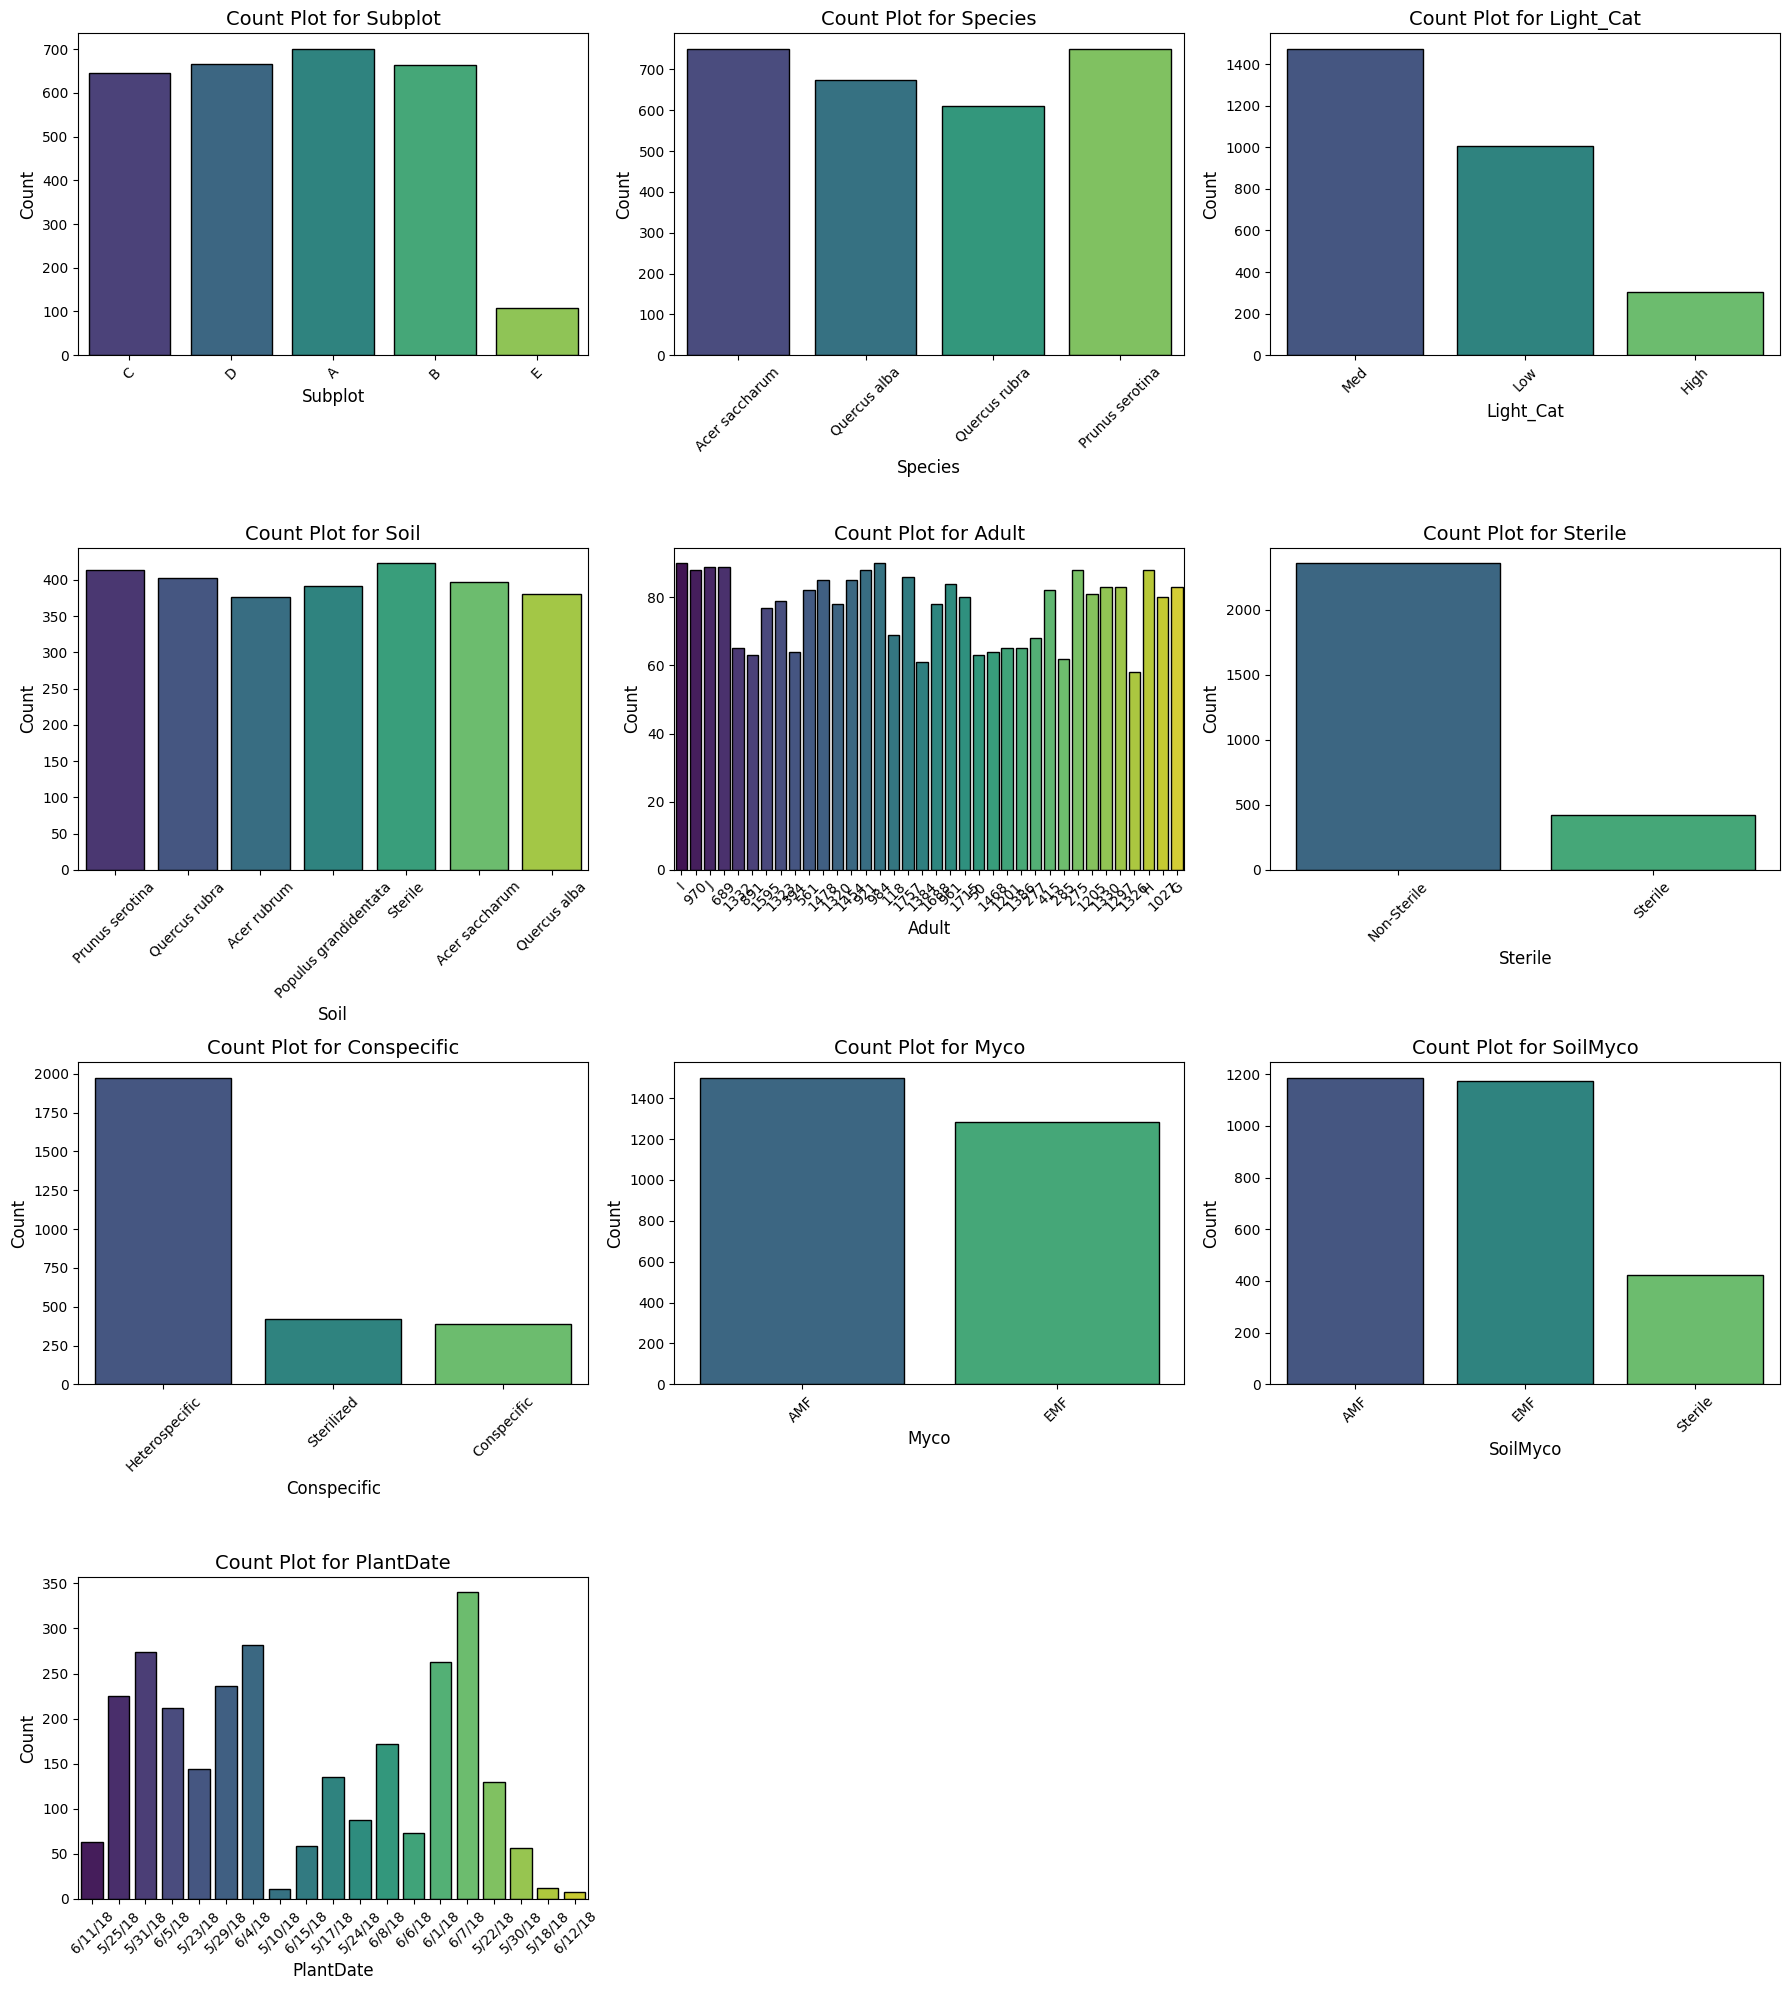

In [22]:
# Plotting each categorical column as a count plot

categorical_cols = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()  

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], palette="viridis", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].set_title(f"Count Plot for {col}", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Preprocessing

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census

In [ ]:
# Dropping unwanted columns

df.drop(columns=['No', 'Tree_ID'], inplace=True, axis=1)

In [26]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [31]:
X = df.drop(columns=['Alive'])
y = df['Alive']

In [32]:
# SMOTE

from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X,y = smt.fit_resample(X,y)

In [33]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [34]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [36]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.9955207166853304, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.832026875699888]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       455
           1       0.99      1.00      1.00       438

    accuracy                           1.00       893
   macro avg       1.00      1.00      1.00       893
weighted avg       1.00      1.00      1.00       893

Confusion Matrix:
 [[452   3]
 [  1 437]]


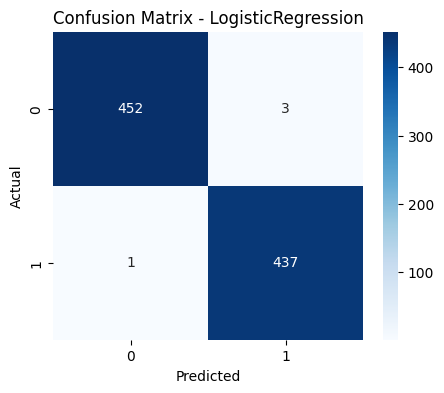

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      1.00      1.00       438

    accuracy                           1.00       893
   macro avg       1.00      1.00      1.00       893
weighted avg       1.00      1.00      1.00       893

Confusion Matrix:
 [[455   0]
 [  0 438]]


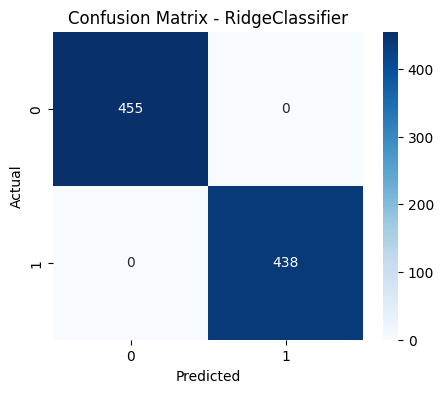

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      1.00      1.00       438

    accuracy                           1.00       893
   macro avg       1.00      1.00      1.00       893
weighted avg       1.00      1.00      1.00       893

Confusion Matrix:
 [[455   0]
 [  0 438]]


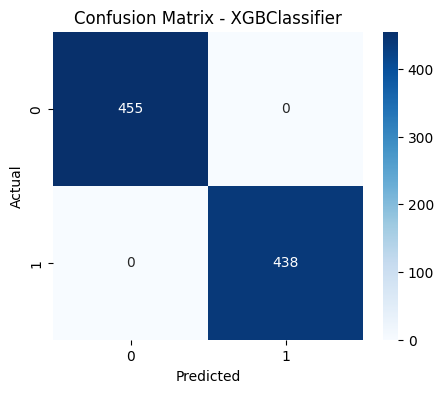

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      1.00      1.00       438

    accuracy                           1.00       893
   macro avg       1.00      1.00      1.00       893
weighted avg       1.00      1.00      1.00       893

Confusion Matrix:
 [[455   0]
 [  0 438]]


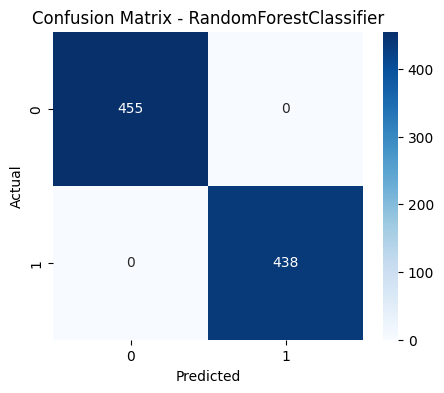

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      1.00      1.00       438

    accuracy                           1.00       893
   macro avg       1.00      1.00      1.00       893
weighted avg       1.00      1.00      1.00       893

Confusion Matrix:
 [[455   0]
 [  0 438]]


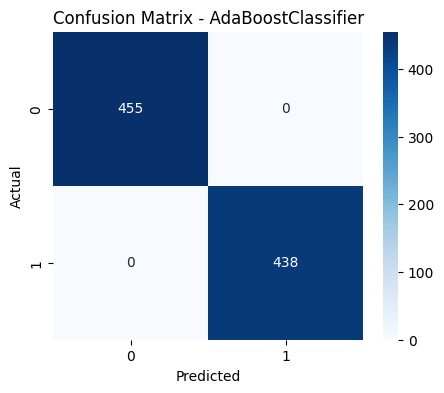

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      1.00      1.00       438

    accuracy                           1.00       893
   macro avg       1.00      1.00      1.00       893
weighted avg       1.00      1.00      1.00       893

Confusion Matrix:
 [[455   0]
 [  0 438]]


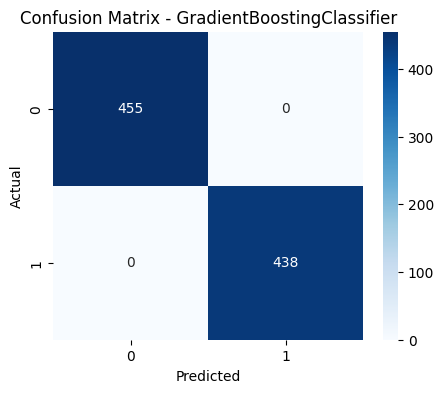

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      1.00      1.00       438

    accuracy                           1.00       893
   macro avg       1.00      1.00      1.00       893
weighted avg       1.00      1.00      1.00       893

Confusion Matrix:
 [[455   0]
 [  0 438]]


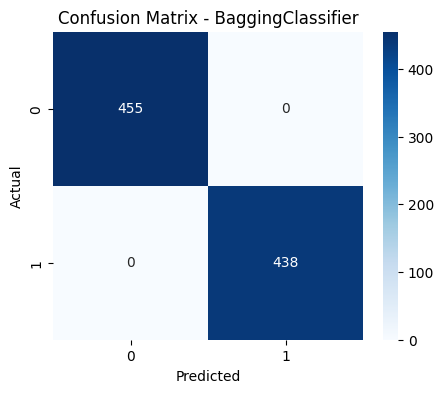

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      1.00      1.00       438

    accuracy                           1.00       893
   macro avg       1.00      1.00      1.00       893
weighted avg       1.00      1.00      1.00       893

Confusion Matrix:
 [[455   0]
 [  0 438]]


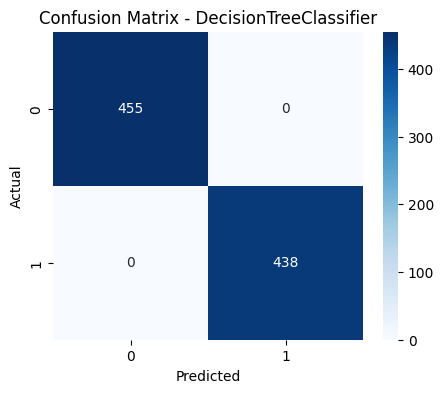

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.69      0.81       455
           1       0.75      0.98      0.85       438

    accuracy                           0.83       893
   macro avg       0.86      0.83      0.83       893
weighted avg       0.86      0.83      0.83       893

Confusion Matrix:
 [[315 140]
 [ 10 428]]


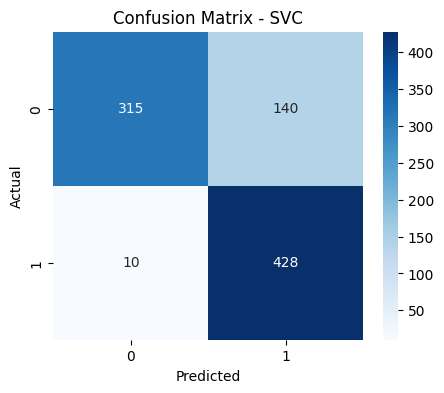

In [37]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()